In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Dataset .csv')

# Handle missing values: drop rows with any missing values
df_clean = df.dropna()

# Show the number of rows before and after cleaning
print("Original shape:", df.shape)
print("After dropping missing values:", df_clean.shape)

# Display the first few rows of the cleaned data
df_clean.head()

Original shape: (9551, 21)
After dropping missing values: (9542, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
categorical_cols = df_clean.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Display the first few rows of the encoded data
df_clean.head()

C:\Users\minus\AppData\Local\Temp\ipykernel_13336\4270908748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col].astype(str))
C:\Users\minus\AppData\Local\Temp\ipykernel_13336\4270908748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col].astype(str))
C:\Users\minus\AppData\Local\Temp\ipykernel_13336\4270908748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3742,162,73,8677,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3167,162,73,6047,592,600,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2892,162,75,4676,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4700,162,75,8682,860,873,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5515,162,75,8681,860,873,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229


In [3]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_clean.drop('Aggregate rating', axis=1)
y = df_clean['Aggregate rating']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7633, 20)
Testing set shape: (1909, 20)


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
reg = LinearRegression()

# Train the model on the training data
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.12
R-squared: 0.51


A higher R-squared value (closer to 1) means the model explains more variance in ratings.
A lower Mean Squared Error means predictions are closer to actual ratings.

Top 5 most influential features:
Has Online delivery: 0.6736
Price range: 0.4824
Rating text: -0.2016
Rating color: -0.1949
Is delivering now: -0.1775


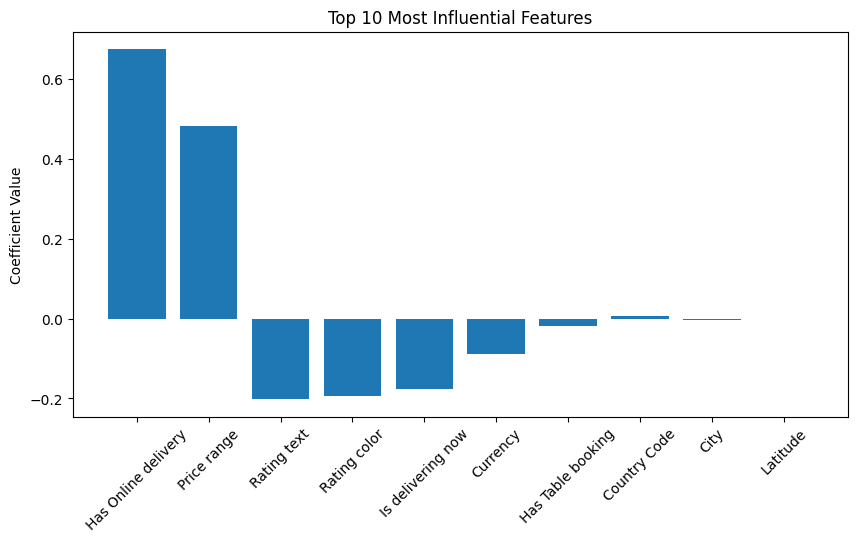

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Interpret the model's results
print("A higher R-squared value (closer to 1) means the model explains more variance in ratings.")
print("A lower Mean Squared Error means predictions are closer to actual ratings.")

# Analyze the most influential features
feature_importance = reg.coef_
features = X.columns

# Sort features by absolute importance
indices = np.argsort(np.abs(feature_importance))[::-1]

print("\nTop 5 most influential features:")
for i in range(5):
    print(f"{features[indices[i]]}: {feature_importance[indices[i]]:.4f}")

# Optional: Plot feature importances
plt.figure(figsize=(10,5))
plt.bar([features[i] for i in indices[:10]], feature_importance[indices[:10]])
plt.xticks(rotation=45)
plt.title("Top 10 Most Influential Features")
plt.ylabel("Coefficient Value")
plt.show()